In [221]:
# importing packages

import pandas as pd
import numpy as np

In [139]:
# Reading lending club data

data = pd.read_csv(r'C:\Users\rrraj\Downloads\loan\loan.csv')
data.head()

c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Processing

In [140]:
# Identifting the Unique records in loan_status column

data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [84]:
# We can filter out all the current applications as they won't help us much in the analysis

filter_data = data[data['loan_status'] != 'Current']

In [85]:
# Lets find out all the columns having only single value that includes columns having NAN, 0, 1 and other single values only
# then eliminate those columns as they don't carry enough information for our analysis

single_value_cols = []
for cols in filter_data.columns.tolist():
    if len(filter_data[cols].unique().tolist()) == 1:
        single_value_cols.append(cols)
single_value_cols

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sa

In [86]:
# lets remove the list of columns we found above from our dataframe

filter_data.drop(single_value_cols, axis=1, inplace=True)

c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
# Now Lets find columns which are having only values as 0 and NAN
# so that we can remove them as they don't carry any useful information for analysis

col_with_0_nan = []
for cols in filter_data.columns.tolist():
    col_shape = filter_data[(filter_data[cols] == 0) | (filter_data[cols].isna())][cols].shape[0]
    if col_shape == filter_data.shape[0]:
        col_with_0_nan.append(cols)
        
col_with_0_nan

['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']

In [91]:
# Lets remove above listed columns from our dataframe

filter_data.drop(col_with_0_nan, axis=1, inplace=True)

c:\users\rrraj\anaconda3\envs\dev6\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [173]:
# Lets remove signs like '%' and '+' from columns int_rate, revol_util and emp_length so that we can use them later for our analysis

filter_data['int_rate'] = filter_data['int_rate'].apply(lambda x: x.replace('%',''))
filter_data['revol_util'] = filter_data['revol_util'].apply(lambda x: x.replace('%','') if isinstance(x,str) else x)
filter_data['emp_length'] = filter_data['emp_length'].apply(lambda x: re.sub('[+]', '', x) if isinstance(x,str) else x)

In [137]:
# Removing columns like employee title , member id, id which has no relation to our analysis
# Columns like funded_amnt, funded_amnt_inv, loan amount are almost having same values , hence we can keep only one of them and remove other.
# Removing desc as enough information is given in purpose and title column
# We can also remove columns like url, zip_code(zip code is not complete and we have customer state details in identifying his location) as they won't help in indentifying defauts.

filter_data.drop(['id','member_id','emp_title','funded_amnt','funded_amnt_inv','desc','url','zip_code'], axis=1, inplace=True)

### Finding Missing Values

In [142]:
# Columns having Missing Values
mis_col = filter_data.columns[filter_data.isna().any()].tolist()

# Number of Missing values in all the columns having missing values
col_mis = {}
for cols in mis_col:
    count = filter_data[cols].isna().sum()
    col_mis.update({cols:(count/filter_data.shape[0])*100})
    
col_mis

{'emp_length': 2.6777613603960906,
 'title': 0.028514399771884805,
 'mths_since_last_delinq': 64.55919330170828,
 'mths_since_last_record': 92.8973222386396,
 'revol_util': 0.12961090805402184,
 'last_pymnt_d': 0.184047489436711,
 'last_credit_pull_d': 0.005184436322160873,
 'pub_rec_bankruptcies': 1.8067760582730643}

In [143]:
# Removing columns having Missing Values more than 50% of the data
# Above we can see, only mths_since_last_delinq and mths_since_last_record have more than 50% missing values
# hence lets drop these columns from our dataframe

filter_data.drop(['mths_since_last_delinq','mths_since_last_record'], axis=1, inplace=True)

In [146]:
# Renaming column term to term (Months) and removing months from the column values to make it easy for analysis

filter_data.rename(columns={'term': 'term(in months)'}, inplace=True)
filter_data['term(in months)'] = filter_data['term(in months)'].apply(lambda x : x.replace('months',''))

### Handling Missing Values

In [164]:
# Imputing missing values for columns having missing values < 50% of the entire data
['title','emp_length', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']

# lets check the type of all columns having missing values < 50%, starting with categorical columns
#  'title' is a categorical column hence we can replace missing values with the mode of the colum

filter_data.title.fillna(filter_data.title.mode(), inplace=True)

In [168]:
# emp_length is also a categorical column with range of values from < 1 to 10 years, so lets replace missing values with mode
filter_data.emp_length.fillna(filter_data.emp_length.mode(), inplace=True)

In [189]:
# pub_rec_bankruptcies is also a categorical column , hence lets replace missing values with mode
filter_data.pub_rec_bankruptcies.fillna(filter_data.pub_rec_bankruptcies.mode(), inplace=True)

In [201]:
# Since dates in last_pymnt_d and last_credit_pull_d are in format of month-year and there are only 101 & 106 values resp
# with missing value percentage 0.18 and 0.005 in the entire dataset, hence considering these categorical columns and replacing mssing values with mode

filter_data.last_pymnt_d.fillna(filter_data.last_pymnt_d.mode(), inplace=True)
filter_data.last_credit_pull_d.fillna(filter_data.last_credit_pull_d.mode(), inplace=True)

<AxesSubplot:>

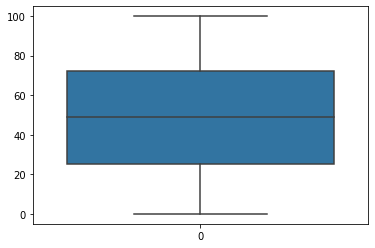

In [207]:
# Since column revol_util is continuous numerical we need to check the distribution of data before filling missing values

sbn.boxplot(data=filter_data[filter_data.revol_util.notnull()]['revol_util'])

In [224]:
# From above boxplot it is clear that there no outliers hence we can replace missing values with mean
# Converting string values in revol_util to float before replacing missing values with mean

# filter_data['revol_util'] = filter_data.revol_util.astype('float')
filter_data.last_credit_pull_d.fillna(np.round(filter_data.revol_util.mean(),decimals=2), inplace=True)

In [258]:
# Converting values in loan_status column to bianry for easy calculation

filter_data['loan_status'] = filter_data['loan_status'].apply(lambda x: 0 if x == 'Charged Off' else 1)

In [149]:
# cleaned data
filter_data.head(5)

,loan_amnt,term(in months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10 years,RENT,24000.0,Verified,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36,15.96,84.33,C,C5,10 years,RENT,12252.0,Not Verified,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36,13.49,339.31,C,C1,10 years,RENT,49200.0,Source Verified,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


# Univariate Analysis

In [152]:
import matplotlib.pyplot as plt
import seaborn as sbn

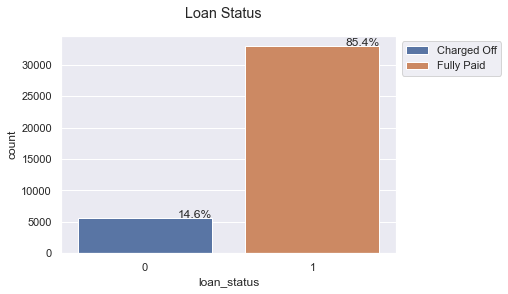

In [431]:
ax = sbn.countplot(data = filter_data, x= filter_data["loan_status"],hue= filter_data["loan_status"], dodge=False)
total = float(len(filter_data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
h,l = ax.get_legend_handles_labels()
labels=["Charged Off","Fully Paid"]
plt.legend(h,labels,loc=2, bbox_to_anchor = (1,1))
plt.suptitle("Loan Status")
plt.show()

<b>Insights:</b> Most of the loan i.e around 85% is fully paid and only around 14% loan customers are charged off

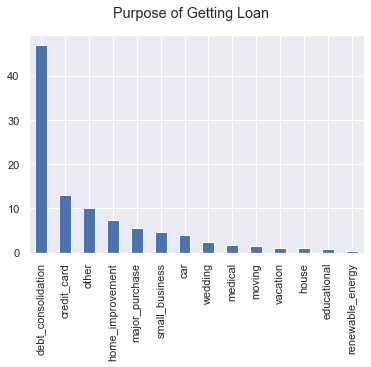

In [365]:
(filter_data['purpose'].value_counts()/len(filter_data)*100).plot.bar()
plt.suptitle("Purpose of Getting Loan")
plt.show()

<b>Insights :</b> From above graph it is clear debt_consolidation is the most common purpose for which people prefer to take loan

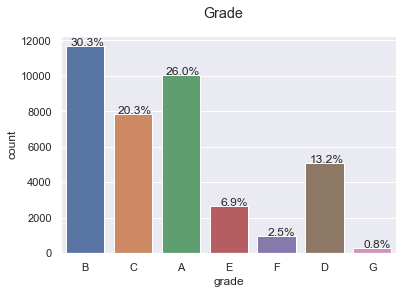

In [433]:
ax = sbn.countplot(x='grade', data=filter_data)
total = float(len(filter_data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.suptitle("Grade")
plt.show()

<b>Insights :</b> From the above graph we can see that majority of the loans are given grade A,B and C.

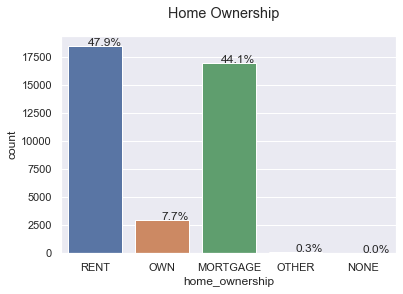

In [435]:
ax = sbn.countplot(x='home_ownership', data=filter_data)
total = float(len(filter_data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.suptitle("Home Ownership")
plt.show()

<b>Insights :</b> People in MORTGAGE and RENT have much more demands of borrowing money than people in OWN and other based on above graph.
The reason We can think of this behaviour is that people who own a house usually have better financial condition than others.

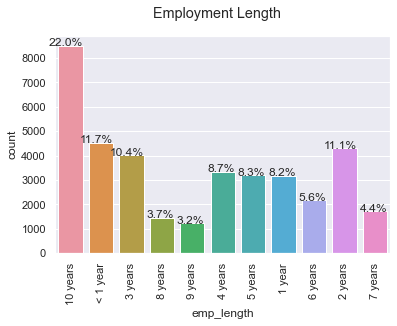

In [442]:
ax = sbn.countplot(x='emp_length', data=filter_data)
total = float(len(filter_data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.xticks(rotation='vertical')
plt.suptitle("Employment Length")
plt.show()

<b>Insights :</b> It's evident from above graph that people with 10 years of experience have taken most of the loan

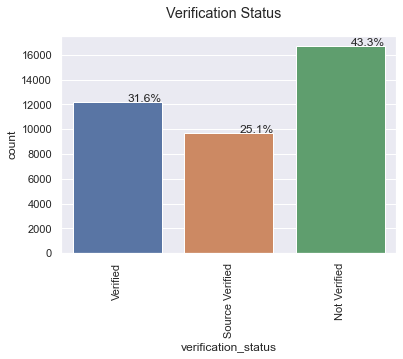

In [437]:
ax = sbn.countplot(x='verification_status', data=filter_data)
total = float(len(filter_data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.xticks(rotation='vertical')
plt.suptitle("Verification Status")
plt.show()

<b>Insights :</b> From above graph it can be seen that people who are Not Verified have take most of the loans

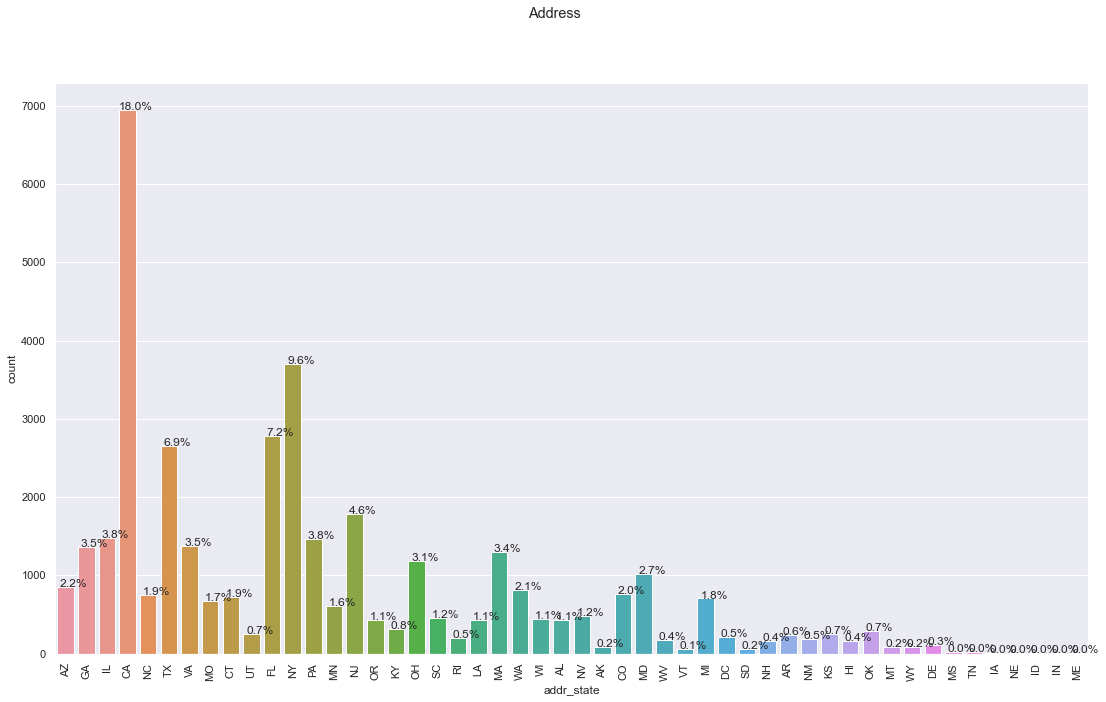

In [448]:
ax = sbn.countplot(x='addr_state', data=filter_data)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
total = float(len(filter_data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xticks(rotation='vertical')
plt.suptitle("Address")
plt.show()

<b>Insights :</b> From graph we can see that people who are from State CA have taken most of the loans than other states.

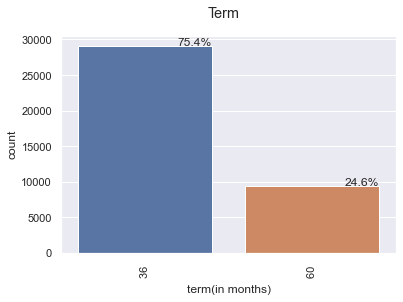

In [482]:
ax = sbn.countplot(x='term(in months)', data=filter_data)
total = float(len(filter_data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.xticks(rotation='vertical')
plt.suptitle("Term")
plt.show()

<b>Insights :</b> From above plot we can see that most of the loans have been taken for a term of 36 months

<AxesSubplot:title={'center':'installment'}, ylabel='Frequency'>

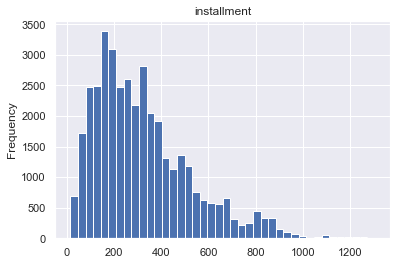

In [352]:

filter_data['installment'].plot.hist(bins=40, title='installment')

<b>Insights :</b> From above plot it can be seen that most of the monthly payment owed by the borrower lies in the range of 150-250.

# Segmented Univariate Analysis

In [461]:
def segmented_univariate_plot(df,col,hue=None):    
    
    "Function to plot segmented univariate plots"
    
    sbn.set(style="darkgrid")
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(18 , 10)
    ax = sbn.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    if len(temp.unique()) > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(filter_data))), (p.get_x()+0.05, p.get_height()+20))  
    else:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp
   
    plt.show()

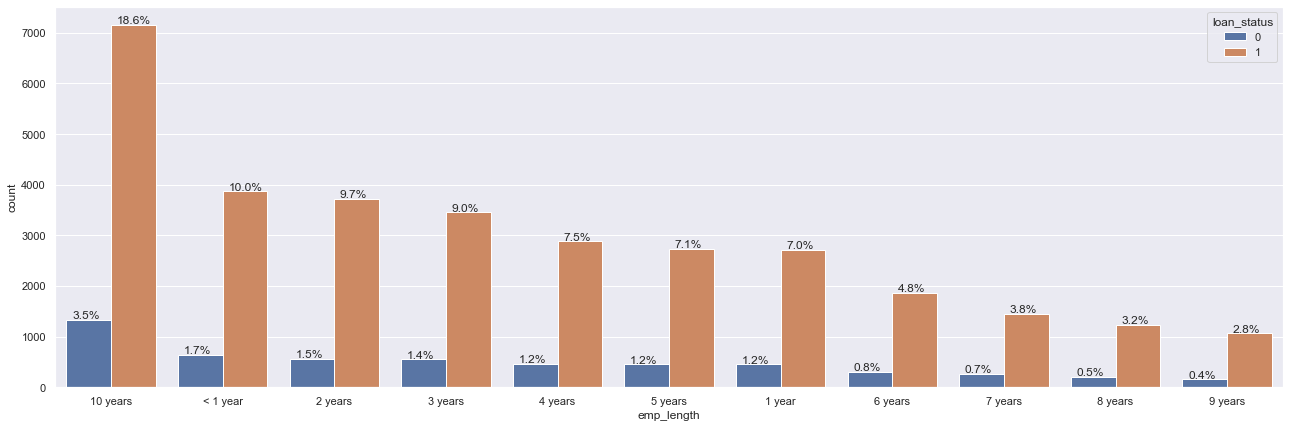

In [294]:
segmented_univariate_plot(df=filter_data,col='emp_length',hue='loan_status')

<b>Insights :</b> From above graph it's quite evident that people with age 10 years have Fully Paid most of the Loans. However a pattern can be seen that as the age increases the number of people fully paying the loan also decreases except for people with 10 years experience.

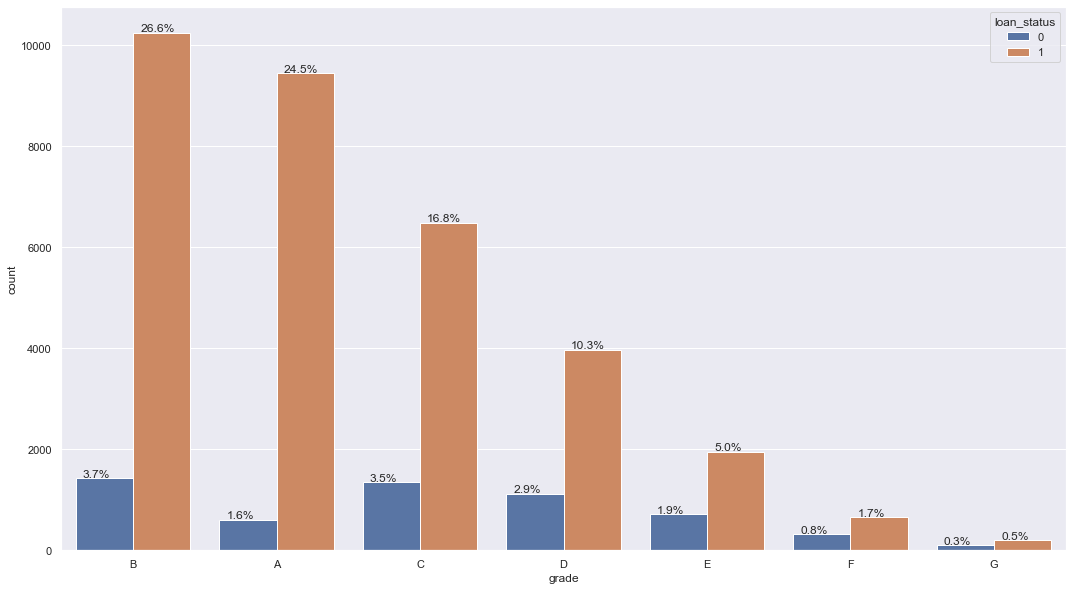

In [462]:
segmented_univariate_plot(df=filter_data,col='grade',hue='loan_status')

<b>Insights :</b> From above graph we can see that most of the loans which are Fully Paid are givem grade A,B,C and as the grade decreases the number of fully apid loans also decrease.

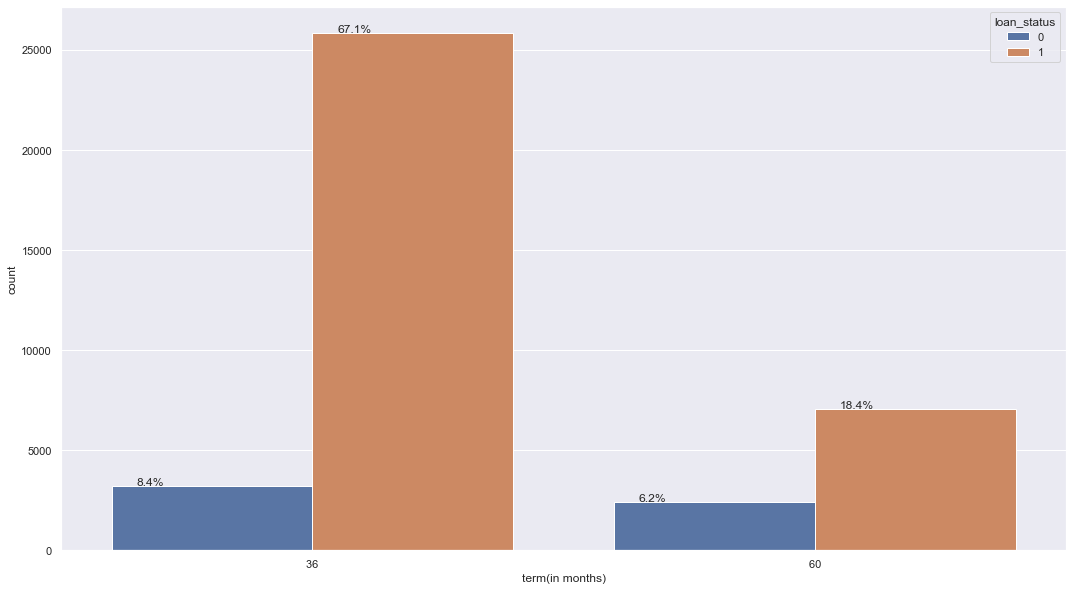

In [475]:
segmented_univariate_plot(df=filter_data,col='term(in months)',hue='loan_status')

<b>Insights :</b> Here we can see that the Loans taken for a term of 36 months constitute more than 65% of the loans which are Fully Paid than loans taken for a term of 60 months which constitute around 18% of the Fully Paid loans.

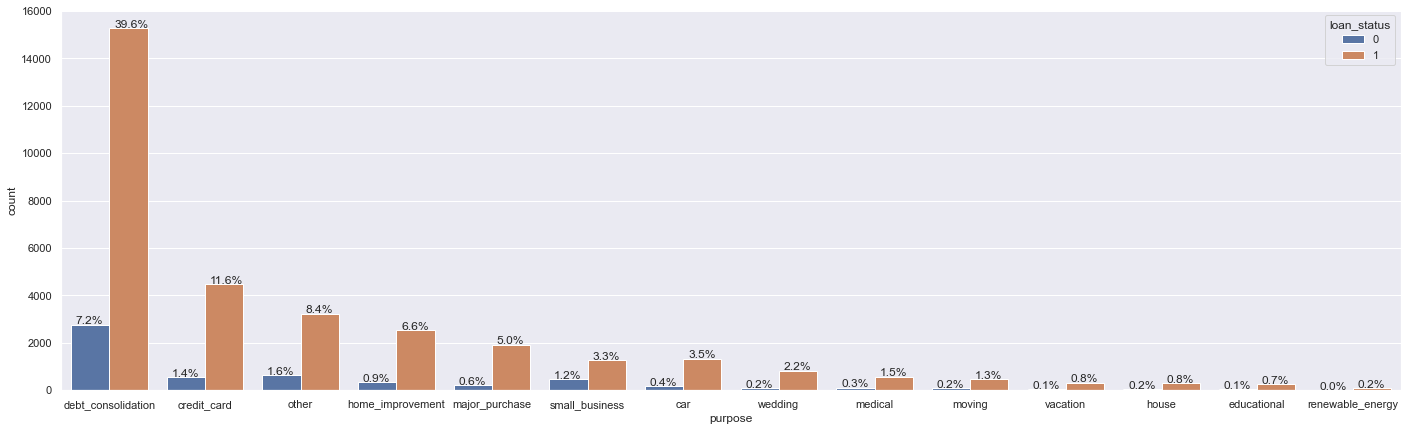

In [300]:
segmented_univariate_plot(df=filter_data,col='purpose',vartype=1,hue='loan_status')

<b>Insights :</b> From above graph we can see that loans taken for the purpose of debt_consolidation are the ones which are Fully Paid majority of times than other purpose.

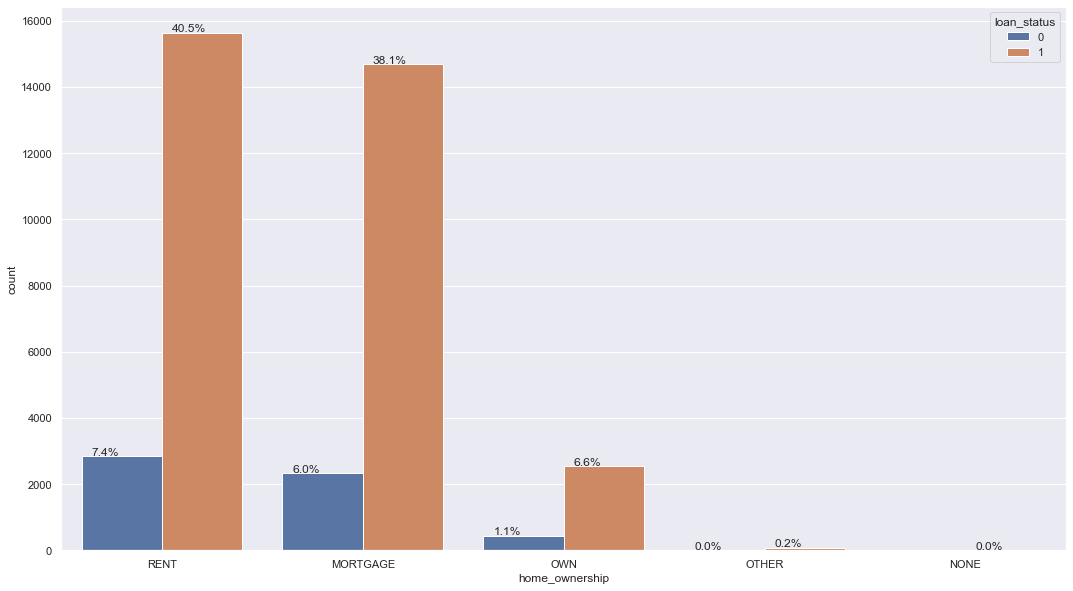

In [473]:
segmented_univariate_plot(df=filter_data,col='home_ownership',hue='loan_status')

<b>Insights :</b> Here we can see people stayed on rent or had any mortgage have paid most of the fully paid loans

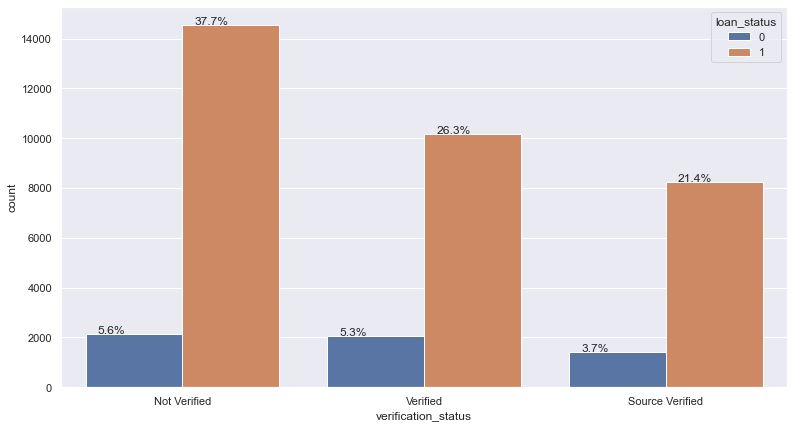

In [346]:
segmented_univariate_plot(df=filter_data,col='verification_status',hue='loan_status')

<b>Insights :</b> It's a bit weird but the fact is that Loans taken by people who are Not Verified are the one's who are Fully paid more than the people who are Verified and Source Verified.

Text(0, 0.5, 'portion of Loans Charged-off')

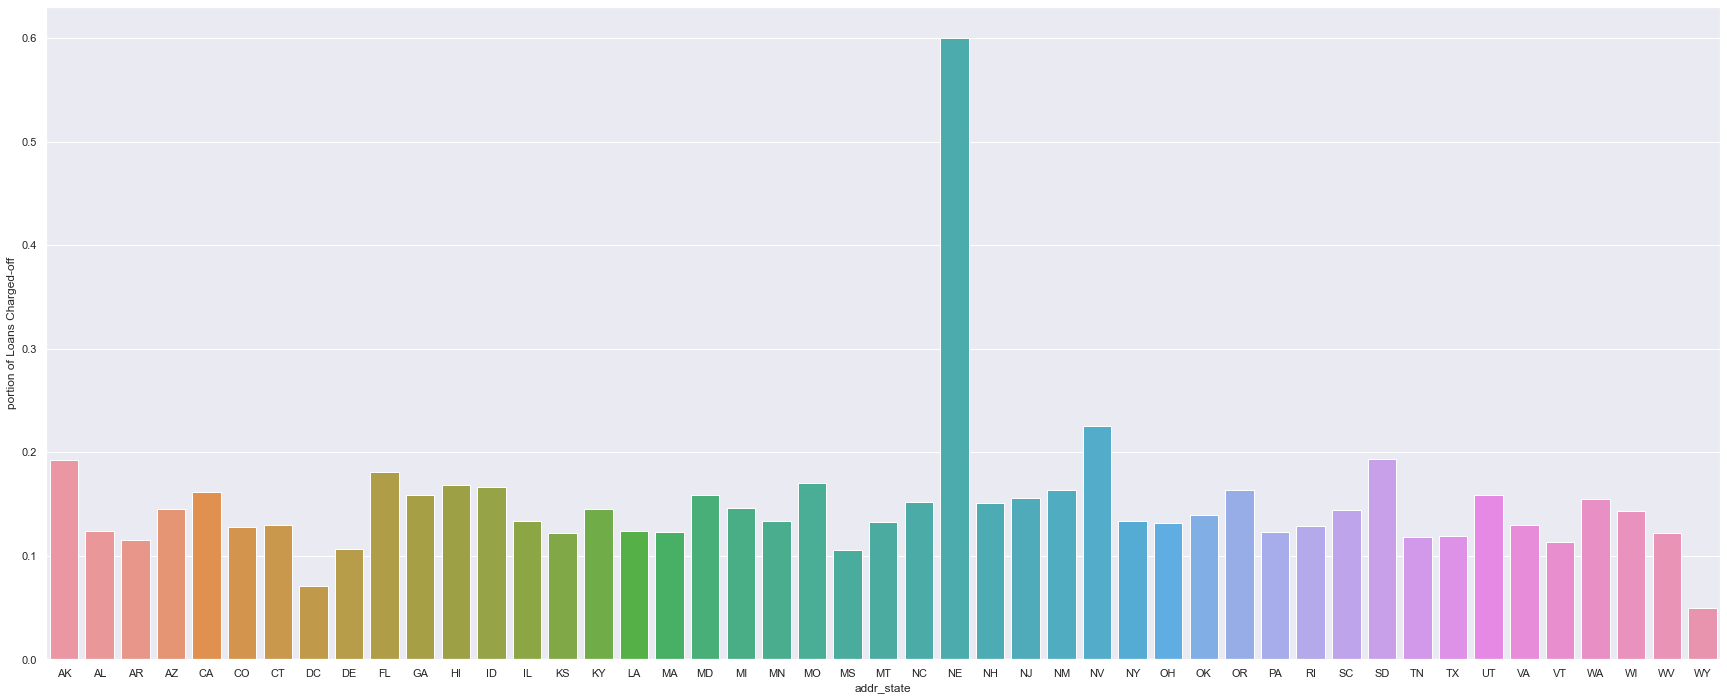

In [492]:
plt.figure(figsize=(30,12))
charge_off_count = filter_data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,0]
a=sbn.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')

<b>Insights :</b> Here we can see that people from state NE have default most of the Loans taken.

# Bivariate Analysis

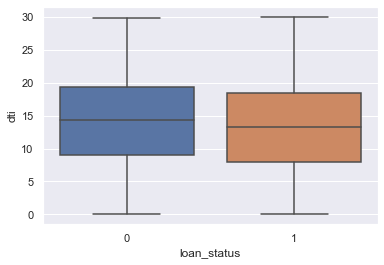

In [311]:
sbn.boxplot(y='dti',x='loan_status',data=filter_data)
plt.show()

<b>Insights :</b> Here we can see that people lying in dti range between 10-20 have high chances of default

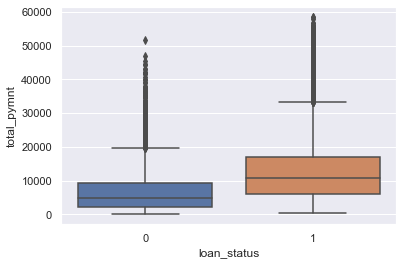

In [312]:
sbn.boxplot(y='total_pymnt',x='loan_status',data=filter_data)
plt.show()

<b>Insights :</b> From above graph we can see that as the total payment increases the loans which are fully paid also increases.

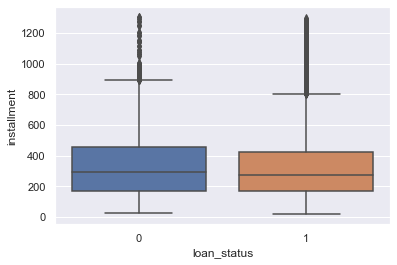

In [313]:
sbn.boxplot(y='installment',x='loan_status',data=filter_data)
plt.show()

<b>Insights :</b> From above graph we can see that loans Charged Off have high installment on average.

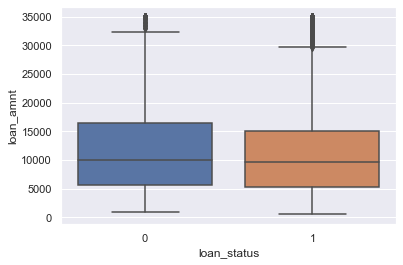

In [324]:
sbn.boxplot(y='loan_amnt',x='loan_status',data=filter_data)
plt.show()

<b>Insights :</b> Here we can see that higher loan amount see a high rate of default.

In [355]:
filter_data['int_rate'] = filter_data.int_rate.astype('float')

<AxesSubplot:xlabel='grade'>

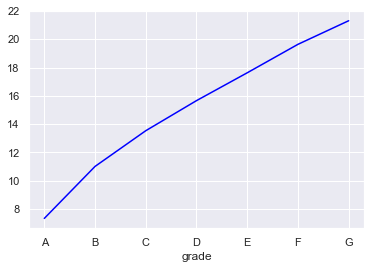

In [356]:
#connection between grades and interest rate

filter_data.groupby('grade')['int_rate'].mean().plot.line(color='blue')

<b>Insights :</b> From above plot we can conclude that Interest rates are higher for loans which are tagged with E,F,G.

<AxesSubplot:xlabel='grade'>

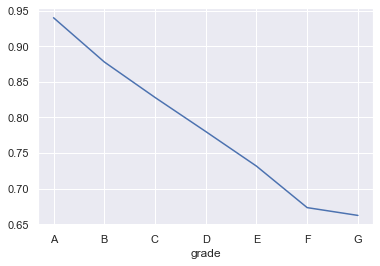

In [360]:
#connection between grades and default rate

filter_data.groupby('grade')['loan_status'].mean().plot.line()

<b>Insights :</b> From above plot we can see that as the grade move from A alphabetically the loans which are Charged off increases.

## Using Derived Columns for bivariate analysis

In [504]:
# Converting String Loan issed column to date formatted colum
filter_data['mod_issue_d'] = pd.to_datetime(filter_data.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [510]:
# Column having only Loan Issued Year
filter_data['loan_issued_year'] = filter_data['mod_issue_d'].apply(lambda x: int(x.year))

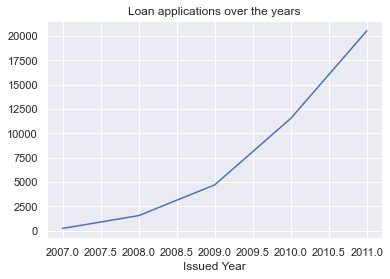

In [513]:
issued_load = filter_data.groupby('loan_issued_year')['loan_status'].count()
issued_load.plot.line(x_compat=True)
plt.title('Loan applications over the years')
plt.xlabel('Issued Year')
plt.show()

<b>Insights :</b> From above plot we can see that with every increasing year the number of loan applications are also increasing

# Multivariate Analysis

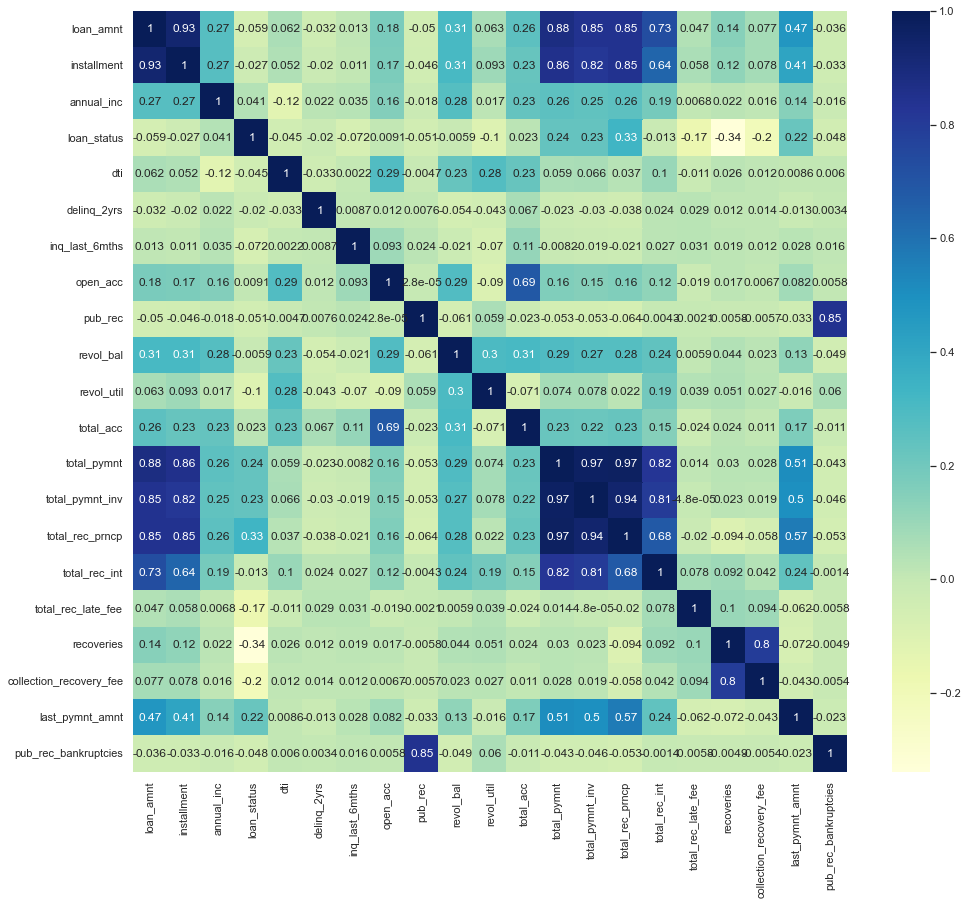

In [330]:
plt.figure(figsize=(16,14))

# heatmap
sbn.heatmap(filter_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

<b>Insights :</b> The above plot shows correlation between different columns, below are some key pointers <br>
                 1. We can see Loan amount and total payment are highly correlated <br>
                 2. Also, Loan amount and total payment inv are also highly correlated, so while doing modelling <br>
                    we can remove columns having similar correlation with loan status and the keep only relevant one's. <br>
                 3. It is also clear that recoveries and loan status are neagtively correlated , which makes sense as the <br>
                    loan status is fully paid the recoveries reduce and viceversa.